<a href="https://colab.research.google.com/github/LeonSilva15/fcc-data-analysis/blob/main/page_view_time_series_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import unittest
from pandas.plotting import register_matplotlib_converters

In [2]:
register_matplotlib_converters()

In [3]:
!wget 'https://raw.githubusercontent.com/LeonSilva15/fcc-data-analysis/main/data/forum_pageviews.csv'

--2023-11-08 23:59:28--  https://raw.githubusercontent.com/LeonSilva15/fcc-data-analysis/main/data/forum_pageviews.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22381 (22K) [text/plain]
Saving to: ‘forum_pageviews.csv’

forum_pageviews.csv 100%[===================>]  21.86K  --.-KB/s    in 0.005s  

2023-11-08 23:59:29 (4.36 MB/s) - ‘forum_pageviews.csv’ saved [22381/22381]



In [4]:
# Set the index to the date column.
df = pd.read_csv( 'forum_pageviews.csv', index_col='date', parse_dates=True )
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


In [5]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [6]:
# Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
df = df[( df[ 'value' ] >= df[ 'value' ].quantile( 0.025 ))
      & ( df[ 'value' ] <= df[ 'value' ].quantile( 0.975 ))]
df.shape

(1238, 1)

In [21]:
def draw_line_plot():
  # Draw line plot
  fig = plt.figure( figsize=( 12, 6 ));
  plt.plot( df.index, df[ 'value' ] );

  plt.xlabel( 'Date' )
  plt.ylabel( 'Page Views' )

  plt.title( 'Daily freeCodeCamp Forum Page Views {}-{}'.format(
      df.index[ 0 ].strftime( '%-m/%Y' ),
      df.index[ -1 ].strftime( '%-m/%Y' )
  ))

  # Save image and return fig (don't change this part)
  fig.savefig('line_plot.png')
  return fig

def draw_bar_plot():
  # Copy and modify data for monthly bar plot
  df_bar = df.copy()
  df_bar[ 'year' ] = df.index.year
  df_bar[ 'month_name' ] = df.index.strftime( '%B' )

  df_bar = df_bar.groupby(['year', 'month_name']).aggregate('mean').reset_index()
  months = pd.date_range( '2020-01', '2020-12', freq='MS' ).strftime( '%B' ).to_list()

  # Draw bar plot
  fig = plt.figure(figsize=(12, 6))

  sns.barplot(
      x='year',
      y='value',
      hue='month_name',
      hue_order=months,
      data=df_bar,
      palette='tab20c',
      ec='gray'
  )
  plt.xlabel('Years')
  plt.ylabel('Average Page Views')

  # Save image and return fig (don't change this part)
  fig.savefig('bar_plot.png')
  return fig

def draw_box_plot():
  # Prepare data for box plots (this part is done!)
  df_box = df.copy()
  df_box.reset_index(inplace=True)
  df_box['year'] = [d.year for d in df_box.date]
  df_box['month'] = [d.strftime('%b') for d in df_box.date]
  months = pd.date_range( '2020-01', '2020-12', freq='MS' ).strftime( '%b' ).to_list()

  # Draw box plots (using Seaborn)
  fig, axes = plt.subplots(1, 2, figsize=(12, 6))

  ax = axes[0]
  sns.boxplot(
      x='year',
      y='value',
      data=df_box,
      ax=ax
  )
  ax.set_title('Year-wise Box Plot (Trend)')
  ax.set_xlabel('Year')
  ax.set_ylabel('Page Views')

  ax = axes[1]
  sns.boxplot(
      x='month',
      y='value',
      data=df_box,
      order=months,
      ax=ax
  )
  ax.set_title('Month-wise Box Plot (Seasonality)')
  ax.set_xlabel('Month')
  ax.set_ylabel('Page Views')

  # Save image and return fig (don't change this part)
  fig.savefig('box_plot.png')
  return fig


Daily freeCodeCamp Page Views


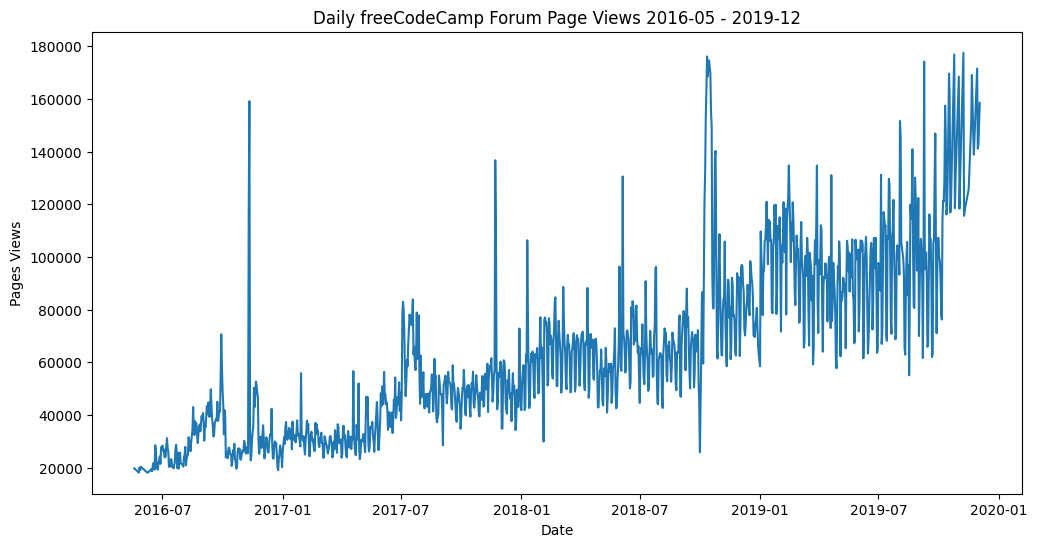

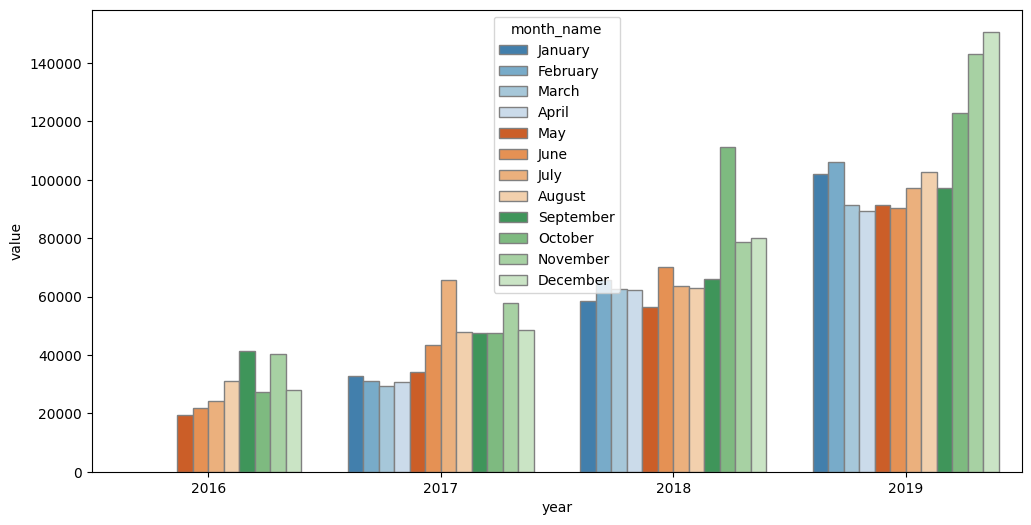

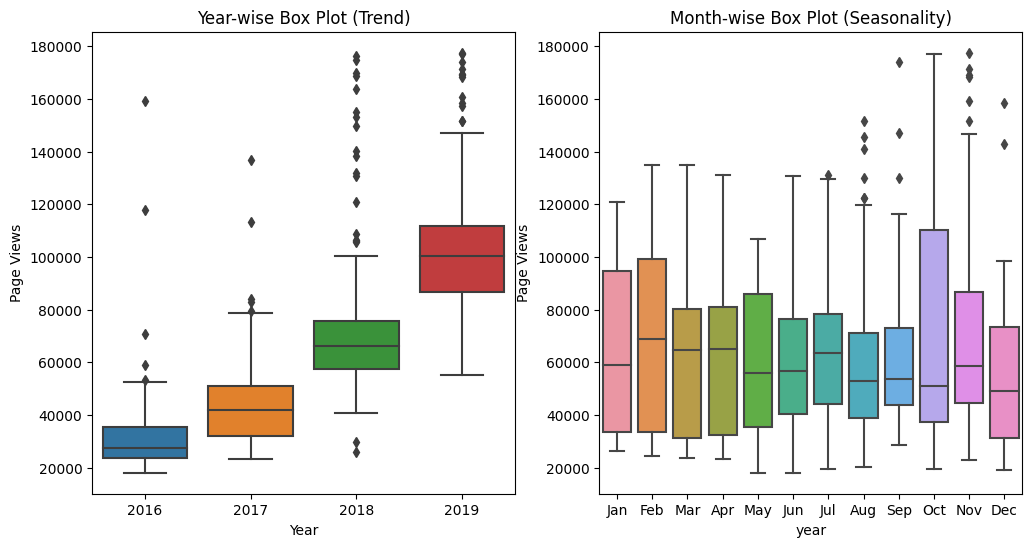

In [12]:
draw_line_plot()
draw_bar_plot()
draw_box_plot()
print( 'Daily freeCodeCamp Page Views' )

In [13]:
class DataCleaningTestCase(unittest.TestCase):
  def test_data_cleaning(self):
    actual = int(df.count(numeric_only=True))
    expected = 1238
    self.assertEqual(actual, expected, "Expected DataFrame count after cleaning to be 1238.")

class LinePlotTestCase(unittest.TestCase):
  def setUp(self):
    self.fig = draw_line_plot()
    self.ax = self.fig.axes[0]

  def test_line_plot_title(self):
    actual = self.ax.get_title()
    expected = "Daily freeCodeCamp Forum Page Views 5/2016-12/2019"
    self.assertEqual(actual, expected, "Expected line plot title to be 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019'")

  def test_line_plot_labels(self):
    actual = self.ax.get_xlabel()
    expected = "Date"
    self.assertEqual(actual, expected, "Expected line plot xlabel to be 'Date'")
    actual = self.ax.get_ylabel()
    expected = "Page Views"
    self.assertEqual(actual, expected, "Expected line plot ylabel to be 'Page Views'")

  def test_line_plot_data_quantity(self):
    actual = len(self.ax.lines[0].get_ydata())
    expected = 1238
    self.assertEqual(actual, expected, "Expected number of data points in line plot to be 1238.")


class BarPlotTestCase(unittest.TestCase):
  def setUp(self):
    self.fig = draw_bar_plot()
    self.ax = self.fig.axes[0]

  def test_bar_plot_legend_labels(self):
    actual = []
    for label in self.ax.get_legend().get_texts():
      actual.append(label.get_text())
    expected = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    self.assertEqual(actual, expected, "Expected bar plot legend labels to be months of the year.")

  def test_bar_plot_labels(self):
    actual = self.ax.get_xlabel()
    expected = "Years"
    self.assertEqual(actual, expected, "Expected bar plot xlabel to be 'Years'")
    actual = self.ax.get_ylabel()
    expected = "Average Page Views"
    self.assertEqual(actual, expected, "Expected bar plot ylabel to be 'Average Page Views'")
    actual = []
    for label in self.ax.get_xaxis().get_majorticklabels():
      actual.append(label.get_text())
    expected = ['2016', '2017', '2018', '2019']
    self.assertEqual(actual, expected, "Expected bar plot secondary labels to be '2016', '2017', '2018', '2019'")

  def test_bar_plot_number_of_bars(self):
    actual = len([rect for rect in self.ax.get_children() if isinstance(rect, mpl.patches.Rectangle)])
    expected = 49
    self.assertEqual(actual, expected, "Expected a different number of bars in bar chart.")


class BoxPlotTestCase(unittest.TestCase):
  def setUp(self):
    self.fig = draw_box_plot()
    self.ax1 = self.fig.axes[0]
    self.ax2 = self.fig.axes[1]

  def test_box_plot_number(self):
    actual = len(self.fig.get_axes())
    expected = 2
    self.assertEqual(actual, expected, "Expected two box plots in figure.")

  def test_box_plot_labels(self):
    actual = self.ax1.get_xlabel()
    expected = "Year"
    self.assertEqual(actual, expected, "Expected box plot 1 xlabel to be 'Year'")
    actual = self.ax1.get_ylabel()
    expected = "Page Views"
    self.assertEqual(actual, expected, "Expected box plot 1 ylabel to be 'Page Views'")
    actual = self.ax2.get_xlabel()
    expected = "Month"
    self.assertEqual(actual, expected, "Expected box plot 2 xlabel to be 'Month'")
    actual = self.ax2.get_ylabel()
    expected = "Page Views"
    self.assertEqual(actual, expected, "Expected box plot 2 ylabel to be 'Page Views'")
    actual = []
    for label in self.ax1.get_xaxis().get_majorticklabels():
      actual.append(label.get_text())
    expected = ['2016', '2017', '2018', '2019']
    self.assertEqual(actual, expected, "Expected box plot 1 secondary labels to be '2016', '2017', '2018', '2019'")
    actual = []
    for label in self.ax2.get_xaxis().get_majorticklabels():
      actual.append(label.get_text())
    expected = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    self.assertEqual(actual, expected, "Expected box plot 2 secondary labels to be 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'")
    actual = []
    for label in self.ax1.get_yaxis().get_majorticklabels():
      actual.append(label.get_text())
    expected = ['0', '20000', '40000', '60000', '80000', '100000', '120000', '140000', '160000', '180000', '200000']
    self.assertEqual(actual, expected, "Expected box plot 1 secondary labels to be '0', '20000', '40000', '60000', '80000', '100000', '120000', '140000', '160000', '180000', '200000'")

  def test_box_plot_titles(self):
    actual = self.ax1.get_title()
    expected = "Year-wise Box Plot (Trend)"
    self.assertEqual(actual, expected, "Expected box plot 1 title to be 'Year-wise Box Plot (Trend)'")
    actual = self.ax2.get_title()
    expected = "Month-wise Box Plot (Seasonality)"
    self.assertEqual(actual, expected, "Expected box plot 2 title to be 'Month-wise Box Plot (Seasonality)'")

  def test_box_plot_number_of_boxes(self):
    actual = len(self.ax1.lines) / 6 # Every box has 6 lines
    expected = 4
    self.assertEqual(actual, expected, "Expected four boxes in box plot 1")
    actual = len(self.ax2.lines) / 6 # Every box has 6 lines
    expected = 12
    self.assertEqual(actual, expected, "Expected 12 boxes in box plot 2")

test_bar_plot_labels (__main__.BarPlotTestCase) ... ok
test_bar_plot_legend_labels (__main__.BarPlotTestCase) ... ok
test_bar_plot_number_of_bars (__main__.BarPlotTestCase) ... ok
test_box_plot_labels (__main__.BoxPlotTestCase) ... ok
test_box_plot_number (__main__.BoxPlotTestCase) ... ok
test_box_plot_number_of_boxes (__main__.BoxPlotTestCase) ... ok
test_box_plot_titles (__main__.BoxPlotTestCase) ... ok
test_data_cleaning (__main__.DataCleaningTestCase) ... ok
test_line_plot_data_quantity (__main__.LinePlotTestCase) ... ok
test_line_plot_labels (__main__.LinePlotTestCase) ... ok
test_line_plot_title (__main__.LinePlotTestCase) ... ok

----------------------------------------------------------------------
Ran 11 tests in 3.476s

OK


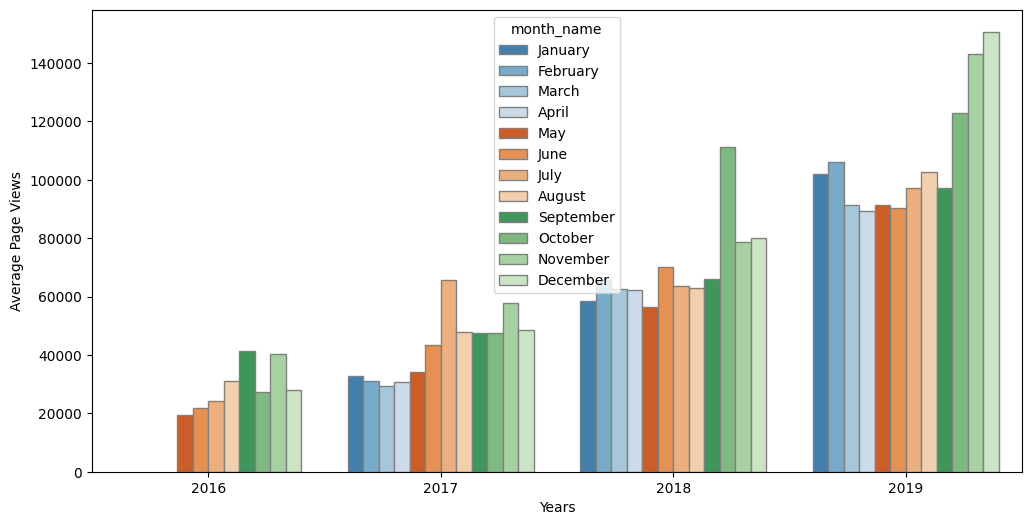

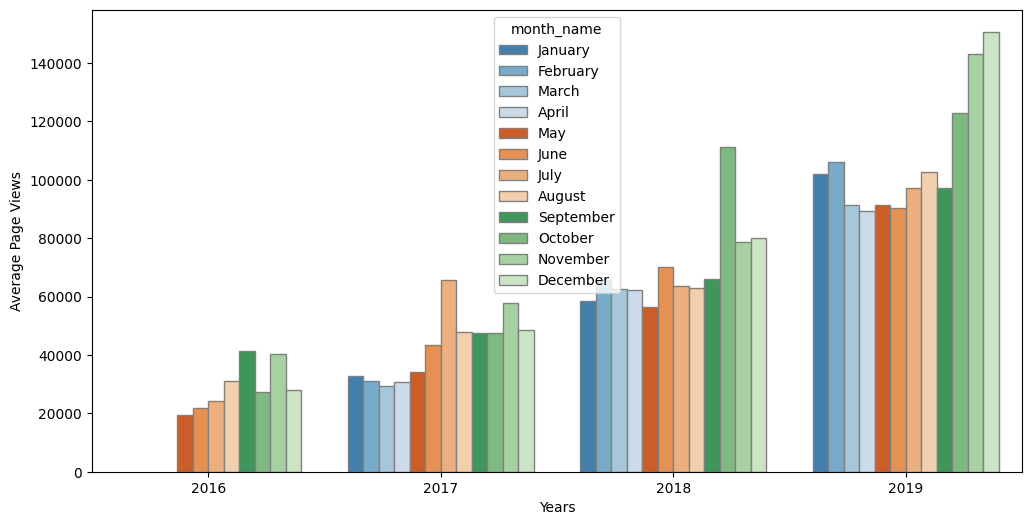

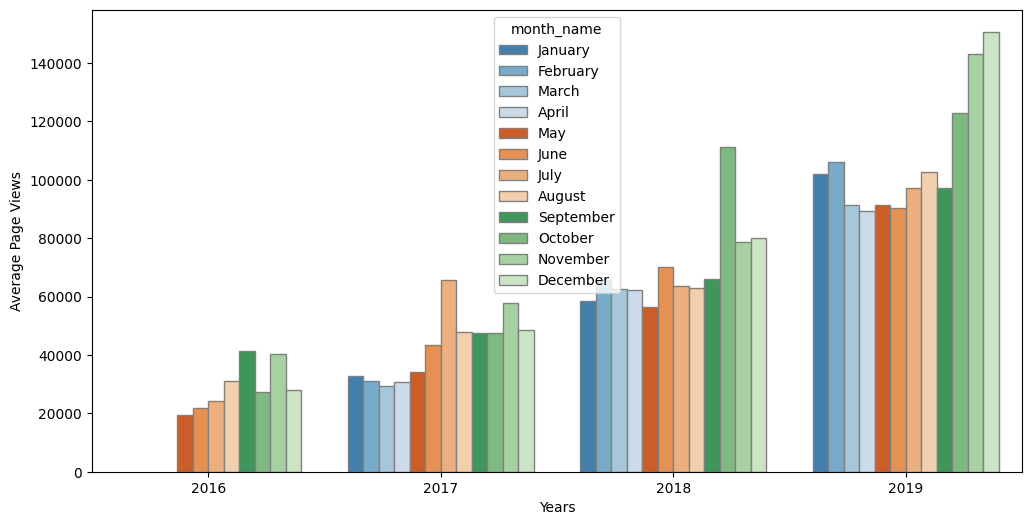

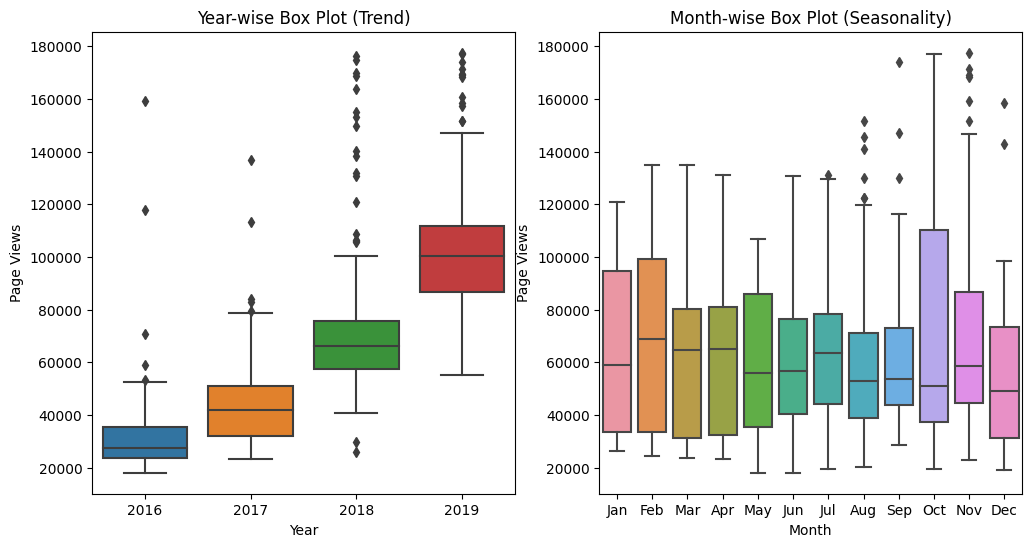

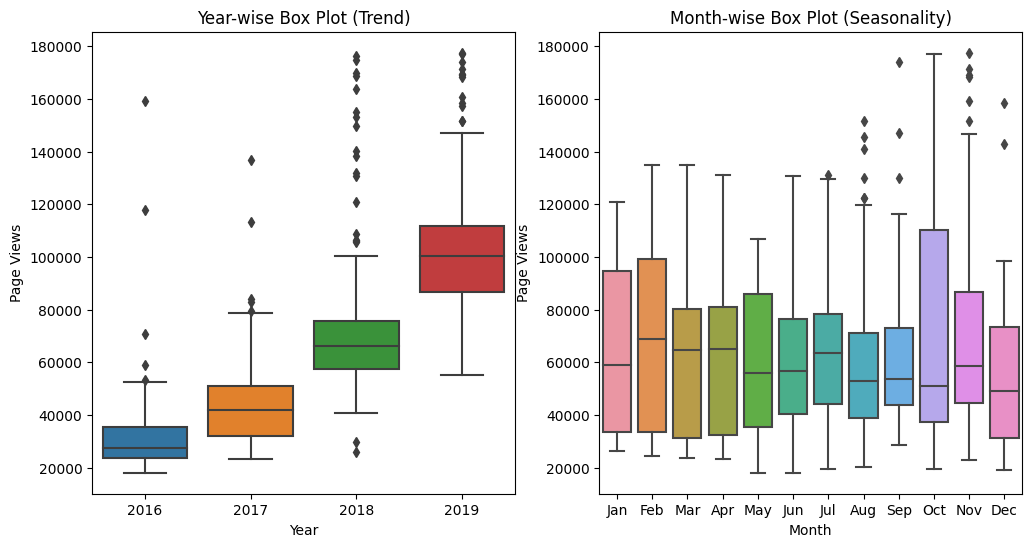

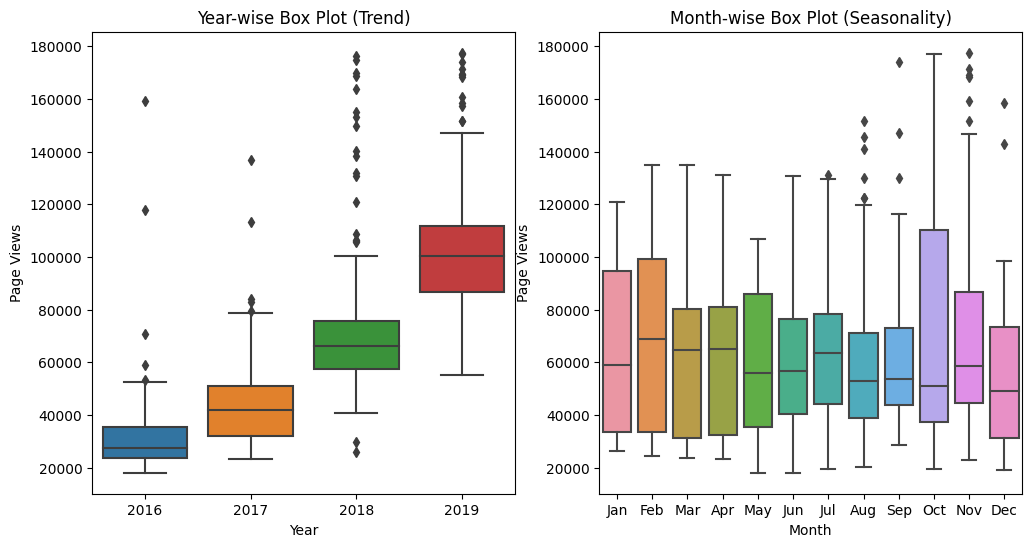

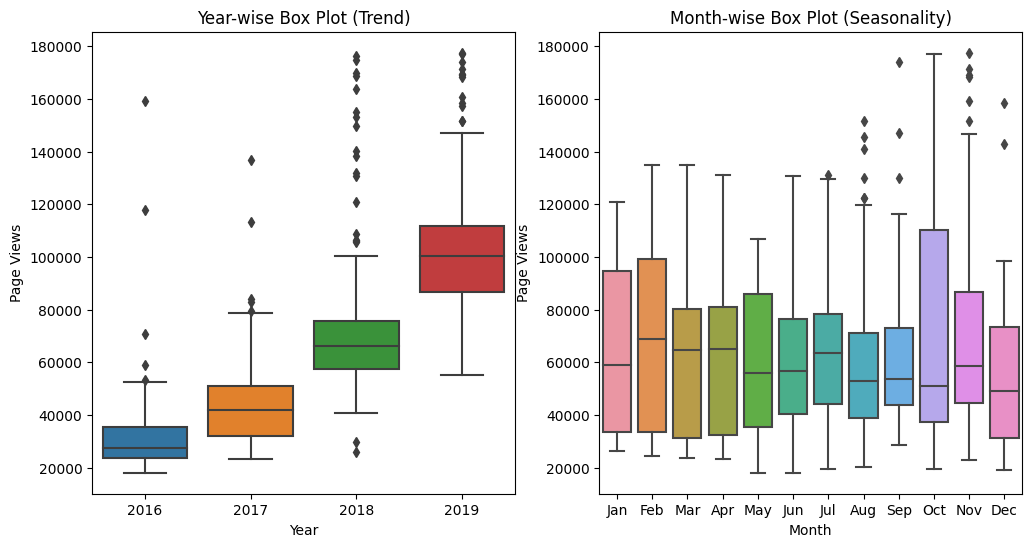

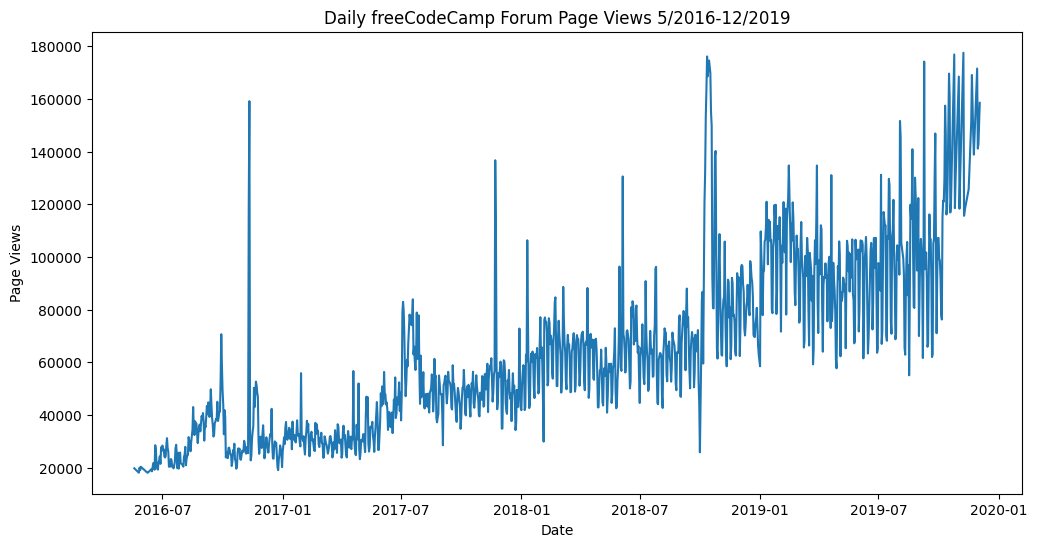

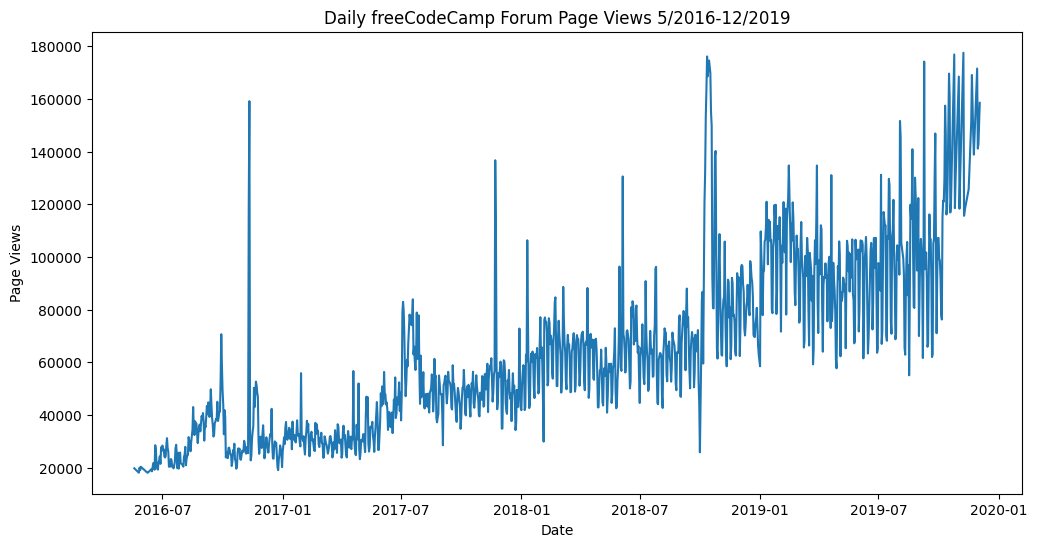

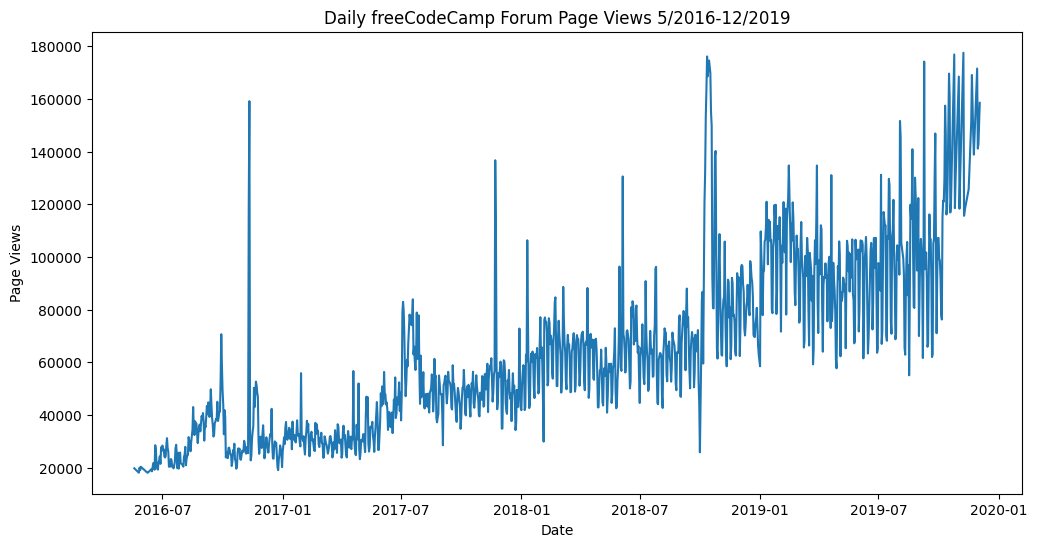

In [22]:
# Run unit tests
unittest.main( argv=[''], verbosity=2, exit=False )